In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import sklearn.metrics as metric
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree
from sklearn.linear_model import LinearRegression, Ridge
from scipy import stats

## Начнём с задачи классификации:

In [2]:
df_class = pd.read_csv('../data/card_transdata.csv')
df = df_class
df.head(10)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
5,5.586408,13.261073,0.064768,1.0,0.0,0.0,0.0,0.0
6,3.724019,0.956838,0.278465,1.0,0.0,0.0,1.0,0.0
7,4.848247,0.320735,1.273050,1.0,0.0,1.0,0.0,0.0
8,0.876632,2.503609,1.516999,0.0,0.0,0.0,0.0,0.0
9,8.839047,2.970512,2.361683,1.0,0.0,0.0,1.0,0.0


In [3]:
df.info()
df['used_chip'] = df['used_chip'].astype(int)
df['repeat_retailer'] = df['repeat_retailer'].astype(int)
df['used_pin_number'] = df['used_pin_number'].astype(int)
df['online_order'] = df['online_order'].astype(int)
df['fraud'] = df['fraud'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          -------

In [4]:
X = df.drop(['fraud'], axis=1)
y= df['fraud']
X

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,57.877857,0.311140,1.945940,1,1,0,0
1,10.829943,0.175592,1.294219,1,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1
3,2.247564,5.600044,0.362663,1,1,0,1
4,44.190936,0.566486,2.222767,1,1,0,1
...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1,1,0,0
999996,19.872726,2.683904,2.778303,1,1,0,0
999997,2.914857,1.472687,0.218075,1,1,0,1
999998,4.258729,0.242023,0.475822,1,0,0,1


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
parameters = {'max_depth': np.arange(1, 10, 1)}

gini_optimal = RandomizedSearchCV(DecisionTreeClassifier(), parameters).fit(X_train, y_train)
gini_optimal.best_params_

C:\Users\1\Jupyter Notebook\venv\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'max_depth': 9}

In [47]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=gini_optimal.best_params_['max_depth'], random_state=0)

In [48]:
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, random_state=0)

In [49]:
y_pred_gini = clf_gini.predict(X_test)

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 1.0000


Точность, конечно, хорошая, но что насчёт переобучения????

In [50]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 1.0000


Просто пушечка, переобучения нет

[Text(0.46875, 0.9375, 'x[2] <= 4.0\ngini = 0.16\nsamples = 800000\nvalue = [730078, 69922]'),
 Text(0.18452380952380953, 0.8125, 'x[0] <= 100.004\ngini = 0.049\nsamples = 717428\nvalue = [699415, 18013]'),
 Text(0.047619047619047616, 0.6875, 'x[1] <= 50.029\ngini = 0.012\nsamples = 681697\nvalue = [677685, 4012]'),
 Text(0.023809523809523808, 0.5625, 'gini = 0.0\nsamples = 671638\nvalue = [671638, 0]'),
 Text(0.07142857142857142, 0.5625, 'x[6] <= 0.5\ngini = 0.48\nsamples = 10059\nvalue = [6047, 4012]'),
 Text(0.047619047619047616, 0.4375, 'gini = 0.0\nsamples = 3468\nvalue = [3468, 0]'),
 Text(0.09523809523809523, 0.4375, 'x[4] <= 0.5\ngini = 0.476\nsamples = 6591\nvalue = [2579, 4012]'),
 Text(0.047619047619047616, 0.3125, 'x[5] <= 0.5\ngini = 0.194\nsamples = 4219\nvalue = [459, 3760]'),
 Text(0.023809523809523808, 0.1875, 'gini = 0.0\nsamples = 3760\nvalue = [0, 3760]'),
 Text(0.07142857142857142, 0.1875, 'gini = 0.0\nsamples = 459\nvalue = [459, 0]'),
 Text(0.14285714285714285, 0

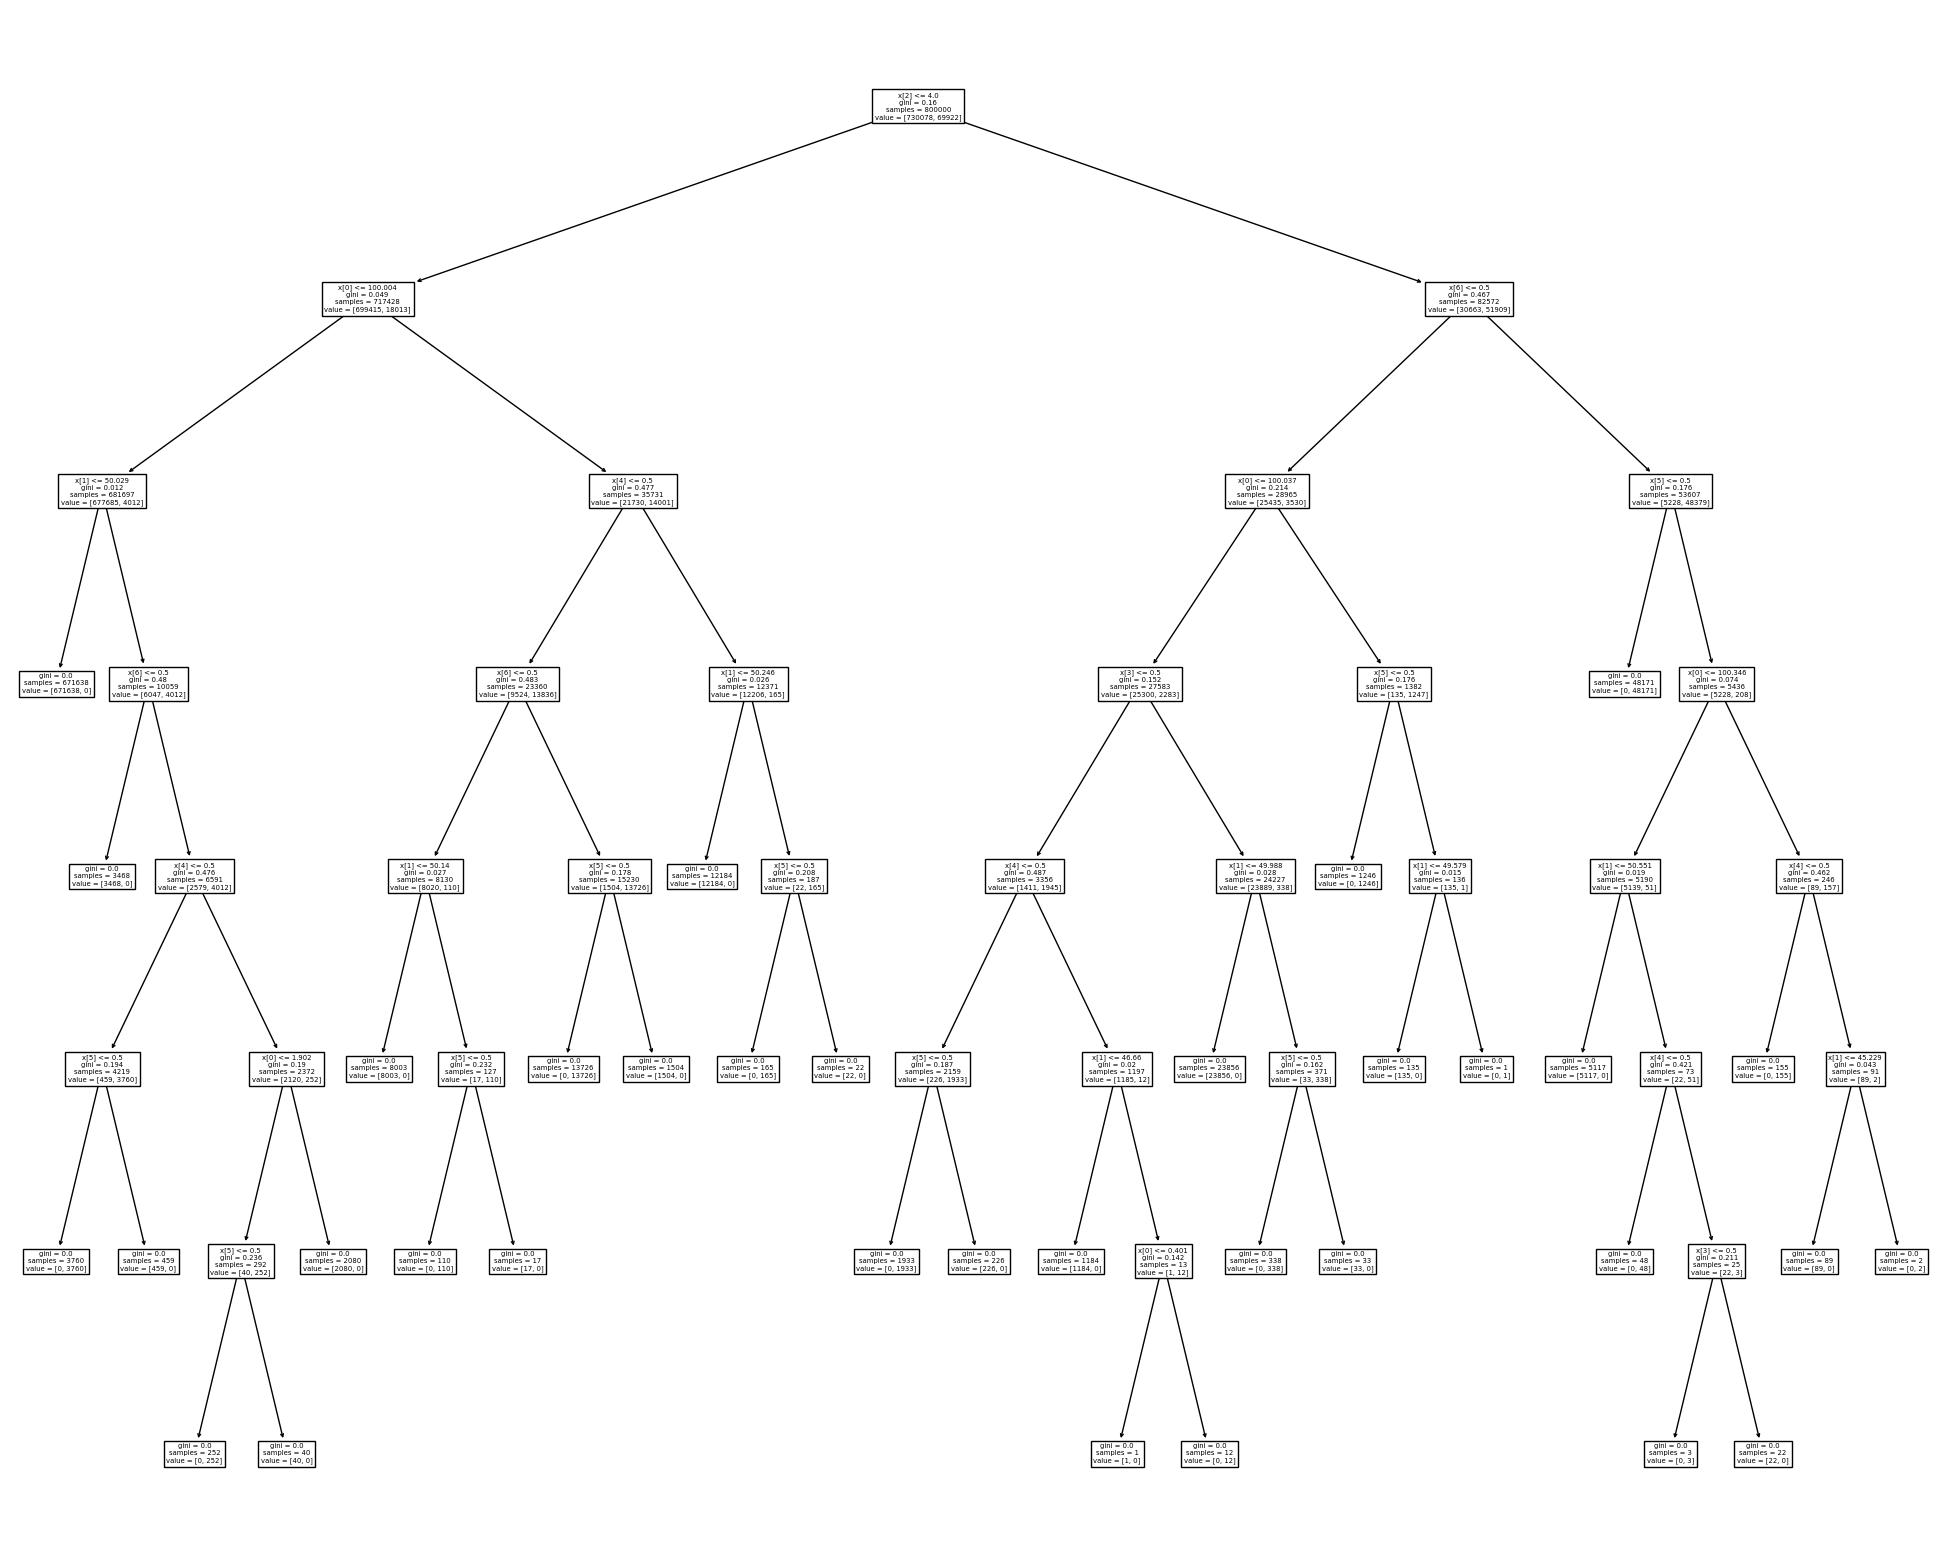

In [51]:
plt.figure(figsize=(25,20))

from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train, y_train))

## Пикарет классификация:

In [52]:
from pycaret.classification import *

In [53]:
setup(data=df,  target='fraud', session_id=555, train_size=0.7, preprocess=True)

,Description,Value
0,Session id,555
1,Target,fraud
2,Target type,Binary
3,Original data shape,"(1000000, 8)"
4,Transformed data shape,"(1000000, 8)"
5,Transformed train set shape,"(700000, 8)"
6,Transformed test set shape,"(300000, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


In [54]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [55]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,0.9997,0.9998,0.9998,0.9998
4,1.0000,0.9999,0.9998,1.0000,0.9999,0.9999,0.9999
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,0.9998,0.9997,1.0000,0.9998,0.9998,0.9998
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,0.9998,0.9997,1.0000,0.9998,0.9998,0.9998


## Ансамбли:

In [6]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [7]:
BC = BaggingClassifier()
BC.fit(X_train, y_train)
y_pred_BagC = BC.predict(X_test)

import pickle
with open("Bagging.pickle", "wb") as f:
        pickle.dump(BC, f)

In [8]:
Grad = GradientBoostingClassifier()
Grad.fit(X_train, y_train)
y_pred_GradC = Grad.predict(X_test)

import pickle
with open("Gradient.pickle", "wb") as f:
        pickle.dump(Grad, f)

In [9]:
estimators = [('rf', RandomForestClassifier())]

Stack = StackingClassifier(estimators=estimators, final_estimator=KNeighborsClassifier(n_neighbors=5))
Stack.fit(X_train, y_train)
y_pred_StackC = Stack.predict(X_test)

import pickle
with open("Stacking.pickle", "wb") as f:
        pickle.dump(Stack, f)

In [60]:
print('Bag  Accuracy = {}'.format(accuracy_score(y_test, y_pred_BagC)))
print('Grad Accuracy = {}'.format(accuracy_score(y_test, y_pred_GradC)))
print('Stack Accuracy = {}'.format(accuracy_score(y_test, y_pred_StackC)))

Bag  Accuracy = 0.999965
Grad Accuracy = 0.99983
Stack Accuracy = 0.999995


## catboost, xgboost, lightgbm

In [61]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(iterations=2,
                          learning_rate=0.5,
                          depth=10)

model.fit(X_train, y_train)

y_pred_catC = model.predict(X_test)

print(classification_report(y_test, y_pred_catC))
confusion_matrix(y_test, y_pred_catC)

0:	learn: 0.3161399	total: 50.9ms	remaining: 50.9ms
1:	learn: 0.1738125	total: 108ms	remaining: 0us
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    182519
           1       0.99      0.99      0.99     17481

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



array([[182409,    110],
       [   153,  17328]], dtype=int64)

In [62]:
from xgboost import XGBClassifier

XGB_classifier = XGBClassifier(eta=0.1, max_depth=6)
XGB_classifier.fit(X_train, y_train)

y_pred_xgbC = XGB_classifier.predict(X_test)
confusion_matrix(y_test, y_pred_xgbC )

array([[182338,    181],
       [   160,  17321]], dtype=int64)

^-^

In [63]:
from lightgbm import LGBMClassifier

lbm = LGBMClassifier(force_row_wise=True)
lbm.fit(X_train, y_train)

y_pred_lbmC = lbm.predict(X_test)
confusion_matrix(y_test, y_pred_xgbC )

[LightGBM] [Info] Number of positive: 69922, number of negative: 730078
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.087402 -> initscore=-2.345771
[LightGBM] [Info] Start training from score -2.345771


array([[182338,    181],
       [   160,  17321]], dtype=int64)

:)

## Перейдём к дереву регрессий

In [111]:
data_reg = pd.read_csv('../data/kc_house_data.csv')
data_reg.head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [112]:
data_reg = data_reg.drop(["date","id"], axis = 1)

In [47]:
yreg = data_reg["price"]
Xreg = data_reg.drop(["price"], axis=1)

In [48]:
Xreg_train, Xreg_test, yreg_train, yreg_test = train_test_split(Xreg, yreg, test_size=0.2)

In [68]:
from sklearn.tree import DecisionTreeRegressor

parameters = {'max_depth': np.arange(1, 10, 1)}

reg_optimal = RandomizedSearchCV(DecisionTreeRegressor(), parameters).fit(Xreg_train, yreg_train)
reg_optimal.best_params_

{'max_depth': 8}

In [69]:
reg = DecisionTreeRegressor(max_depth=reg_optimal.best_params_['max_depth'])
reg.fit(Xreg_train, yreg_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='squared_error', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      random_state=None, splitter='best')

In [70]:
print('Training set score: {:.4f}'.format(reg.score(Xreg_train, yreg_train)))
print('Test set score: {:.4f}'.format(reg.score(Xreg_test, yreg_test)))

Training set score: 0.8677
Test set score: 0.7857


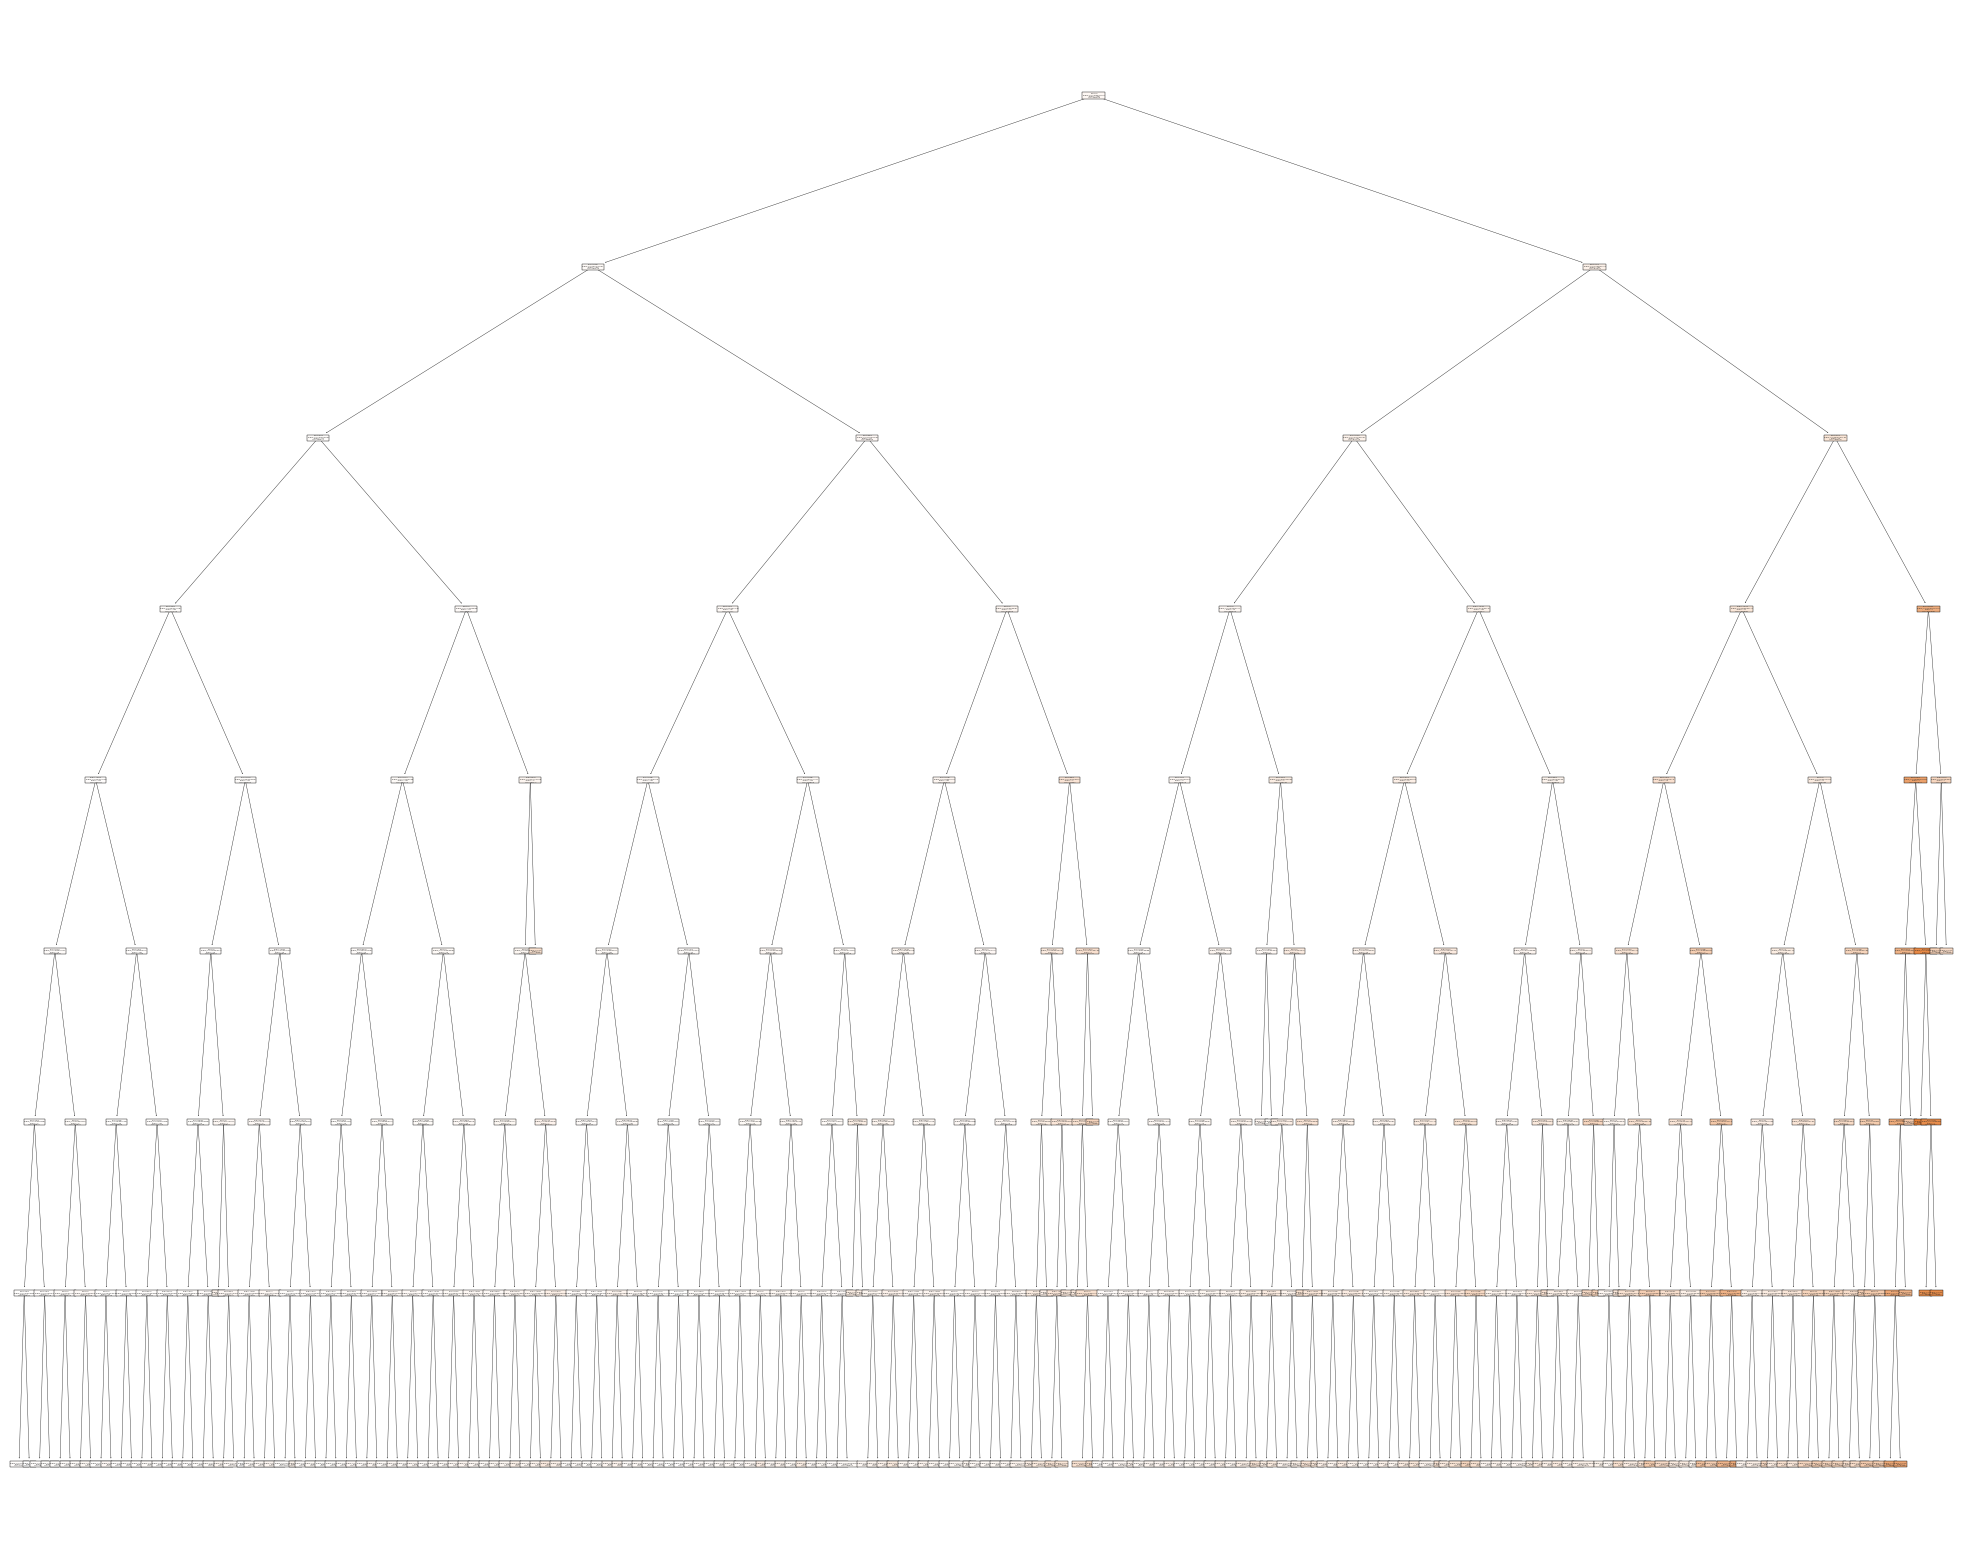

In [71]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(reg, filled=True)

Невероятная картина

## Пикарет регрессия:

In [72]:
from pycaret.regression import *

In [73]:
setup(data=data_reg,  target='price', session_id=123, train_size=0.7, preprocess=True)

,Description,Value
0,Session id,123
1,Target,price
2,Target type,Regression
3,Original data shape,"(21613, 19)"
4,Transformed data shape,"(21613, 19)"
5,Transformed train set shape,"(15129, 19)"
6,Transformed test set shape,"(6484, 19)"
7,Numeric features,18
8,Preprocess,True
9,Imputation type,simple


In [74]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [75]:
dt_reg = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,94899.4022,28424876051.0286,168596.7854,0.7802,0.2412,0.1796
1,112353.5291,77499746369.5831,278387.7626,0.4732,0.2688,0.1975
2,95966.7617,27204358724.2982,164937.4388,0.7758,0.2516,0.1867
3,109559.8866,41382234286.5944,203426.2380,0.7779,0.2579,0.1903
4,99200.9788,29614493959.1454,172088.6224,0.6975,0.2575,0.1922
5,106518.6236,35508643189.6096,188437.3721,0.7651,0.2530,0.1917
6,103837.3255,46263376831.4754,215089.2299,0.6407,0.2586,0.1920
7,100830.5254,28670516500.5311,169323.7033,0.7487,0.2524,0.1883
8,104292.7819,43737959707.9214,209136.2228,0.6987,0.2574,0.1850


In [76]:
tuned_dt_reg = tune_model(dt_reg)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,87868.0178,25537844748.2872,159805.6468,0.8025,0.2183,0.1659
1,99980.7987,53604695660.9790,231526.8789,0.6356,0.2295,0.1714
2,84078.2062,20123919617.3880,141858.8017,0.8341,0.2154,0.1655
3,97535.6546,40559454113.3234,201393.7787,0.7823,0.2206,0.1669
4,86492.8107,21618510369.5204,147032.3446,0.7792,0.2190,0.1688
5,94861.8920,30298539939.8667,174064.7579,0.7996,0.2177,0.1663
6,91057.6445,31645594791.6949,177892.0875,0.7542,0.2202,0.1676
7,89134.8217,23189131157.5447,152279.7792,0.7967,0.2172,0.1653
8,95022.2265,39786437521.2350,199465.3793,0.7259,0.2279,0.1656


Fitting 10 folds for each of 10 candidates, totalling 100 fits


## Ансамбли:

In [77]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

In [78]:
BC = BaggingRegressor()
BC.fit(Xreg_train, yreg_train)
y_pred_Bag = BC.predict(Xreg_test)

In [79]:
Grad = GradientBoostingRegressor()
Grad.fit(Xreg_train, yreg_train)
y_pred_Grad = Grad.predict(Xreg_test)

In [80]:
estimators = [('lr', Ridge(alpha=0.74))]

Stack = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
Stack.fit(Xreg_train, yreg_train)
y_pred_Stack = Stack.predict(Xreg_test)

In [81]:
print('Bag  Accuracy = {}'.format(BC.score(Xreg_test, yreg_test)))
print('Grad Accuracy = {}'.format(Grad.score(Xreg_test, yreg_test)))
print('Stack Accuracy = {}'.format(Stack.score(Xreg_test, yreg_test)))

Bag  Accuracy = 0.86985514018452
Grad Accuracy = 0.8779188922186654
Stack Accuracy = 0.7062005780244927


## catboost, xgboost, lightgbm

In [82]:
from catboost import CatBoostRegressor

model = CatBoostRegressor(iterations=2,
                          learning_rate=0.5,
                          depth=10)

model.fit(Xreg_train, yreg_train)

y_pred_catC = model.predict(Xreg_test)

0:	learn: 255757.7466251	total: 19.6ms	remaining: 19.6ms
1:	learn: 195065.0000499	total: 40.9ms	remaining: 0us


In [84]:
from xgboost import XGBRegressor

XGB_regressor = XGBRegressor(eta=0.1, max_depth=6)
XGB_regressor.fit(Xreg_train, yreg_train)

y_pred_xgbC = XGB_regressor.predict(Xreg_test)

In [85]:
from lightgbm import LGBMRegressor

lbm = LGBMRegressor(force_row_wise=True)
lbm.fit(Xreg_train, yreg_train)

y_pred_lbmC = lbm.predict(Xreg_test)

[LightGBM] [Info] Total Bins 2334
[LightGBM] [Info] Number of data points in the train set: 17290, number of used features: 18
[LightGBM] [Info] Start training from score 540904.288201


In [86]:
print(model.score(Xreg_test, yreg_test))
print(XGB_regressor.score(Xreg_test, yreg_test))
print(lbm.score(Xreg_test, yreg_test))

0.7030318014518572
0.8879766928196996
0.8990588213142637


уааааааааааааааааааа точность 0.9 сюдааааааааааааааааааааа

## CART

In [113]:
df_class1 = df_class.sample(5000)
X_class = np.array(df_class1.drop(['fraud'], axis = 1))
y_class = np.array(df_class1['fraud'])

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.2)

In [121]:
class CART:
    
    def __init__(self, func, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        if(func == 'gini'):
            self.func = lambda x,y : self._gini(x,y)
        elif(func == 'mse'):
            self.func = lambda x,y : self._mse(x,y)
        self._funcName = func
        
    def fit(self, X, y):
        self.root = self._build_tree(X, y, depth=0)
        

    def _build_tree(self, X, y, depth):
        
        if (self.max_depth is not None and depth >= self.max_depth) or len(X) <= self.min_samples_split:
            if(self._funcName == 'mse'):
                leaf_value = np.mean(y)
                
                return {'leaf': True, 'value': leaf_value}
            else:
                class_counts = stats.mode(y)[0]

                return {'leaf': True, 'value': np.argmax(class_counts)}
        
        
        best_feature, best_threshold = self._find_best_split(X, y)
         
        left_child_indices = X[:, best_feature] <= best_threshold
        right_child_indices = X[:, best_feature] > best_threshold
        
        
        node = {
            'feature': best_feature,
            'threshold': best_threshold,
            'left': self._build_tree(X[left_child_indices], y[left_child_indices], depth + 1),
            'right': self._build_tree(X[right_child_indices], y[right_child_indices], depth + 1)
        }
        
        return node
    
    
    def _find_best_split(self, X, y):
        
        best_param = float('inf')
        best_feature = None
        best_threshold = None
        
        
        for feature in range(X.shape[1]):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                
                left_indices = X[:, feature] <= threshold
                right_indices = X[:, feature] > threshold
                
                
                param = self.func(y[left_indices], y[right_indices])
                 
                
                if param < best_param:
                    best_param = param
                    best_feature = feature
                    best_threshold = threshold
        
        return best_feature, best_threshold
    
    def _mse(self, left_y, right_y):
        left_mse = np.mean((left_y - np.mean(left_y))**2)
        right_mse = np.mean((right_y - np.mean(right_y))**2)
        mse = (len(left_y) * left_mse + len(right_y) * right_mse) / (len(left_y) + len(right_y))
        return mse

    def _gini(self, left_y, right_y):
        
        left_gini = 1 - np.sum((np.bincount(left_y) / len(left_y))**2)
        right_gini = 1 - np.sum((np.bincount(right_y) / len(right_y))**2)
        gini = (len(left_y) * left_gini + len(right_y) * right_gini) / (len(left_y) + len(right_y))
        return gini
    
    
    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])
    
    
    def _traverse_tree(self, x, node):
        
        if 'leaf' in node:
            return node['value']
        
        if x[node['feature']] <= node['threshold']:
            return self._traverse_tree(x, node['left'])
        
        else:
            return self._traverse_tree(x, node['right']) 

In [122]:
data_reg1 = data_reg.sample(1000)
Xreg = np.array(data_reg1.drop(["price"], axis=1))
yreg= np.array(data_reg1['price'])
Xreg

array([[ 3.00000e+00,  2.25000e+00,  1.98000e+03, ..., -1.22359e+02,
         1.55000e+03,  9.24000e+03],
       [ 3.00000e+00,  2.50000e+00,  2.51000e+03, ..., -1.22042e+02,
         2.66000e+03,  5.61400e+03],
       [ 3.00000e+00,  2.50000e+00,  2.25000e+03, ..., -1.22379e+02,
         1.32000e+03,  5.39000e+03],
       ...,
       [ 3.00000e+00,  1.00000e+00,  1.16000e+03, ..., -1.22359e+02,
         1.34000e+03,  3.75000e+03],
       [ 4.00000e+00,  3.25000e+00,  2.32000e+03, ..., -1.22292e+02,
         2.32000e+03,  6.24000e+03],
       [ 2.00000e+00,  2.00000e+00,  1.45000e+03, ..., -1.22282e+02,
         2.17000e+03,  4.37000e+03]])

In [123]:
Xreg_train, Xreg_test, yreg_train, yreg_test = train_test_split(Xreg, yreg, test_size=0.2)

In [124]:
from sklearn.metrics import accuracy_score,r2_score , mean_squared_error
regressor = CART(func='mse',max_depth=10, min_samples_split=10)
regressor.fit(Xreg_train, yreg_train)

predictions = regressor.predict( Xreg_test)

mse = mean_squared_error(yreg_test, predictions)
print('MSE:', mse)

r2 = r2_score(yreg_test, predictions)
print('R^2:', r2)

C:\Users\1\Jupyter Notebook\venv\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\1\Jupyter Notebook\venv\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


MSE: 37837003438.67211
R^2: 0.7003611299305854


In [126]:
cartClassifier = CART(func='gini', max_depth=10, min_samples_split=5)

cartClassifier.fit(X_train, y_train) 

y_pred_classifier = cartClassifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_classifier)
print(f'Accuracy: {accuracy}')

C:\Users\1\AppData\Local\Temp\ipykernel_1764\3606679757.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  class_counts = stats.mode(y)[0]


Accuracy: 0.916
